### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
import yfinance as yf

### Loading the data

In [2]:
def get_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    return data

### Creating Sequences

In [3]:
# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 3])  # 3 is the index of 'Close' in features
    return np.array(X), np.array(y)

### LSTM Model

In [4]:
# Function to build and train LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

### CNN model 

In [5]:
# Function to build and train CNN model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

### Evaluation and Visualization 

In [7]:
def evaluate_and_visualize(ticker, y_test, lstm_pred, cnn_pred):
    lstm_mae = mean_absolute_error(y_test, lstm_pred)
    cnn_mae = mean_absolute_error(y_test, cnn_pred)
    lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
    cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_pred))

    print(f'{ticker} Results:')
    print(f'LSTM Mean Absolute Error: ${lstm_mae:.2f}')
    print(f'CNN Mean Absolute Error: ${cnn_mae:.2f}')
    print(f'LSTM Root Mean Squared Error: ${lstm_rmse:.2f}')
    print(f'CNN Root Mean Squared Error: ${cnn_rmse:.2f}')
    
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Actual Prices')
    plt.plot(lstm_pred, label='LSTM Predictions')
    plt.plot(cnn_pred, label='CNN Predictions')
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Time Steps')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

### Analyzation


Analyzing AAPL


[*********************100%***********************]  1 of 1 completed
C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AAPL Results:
LSTM Mean Absolute Error: $1.97
CNN Mean Absolute Error: $2.97
LSTM Root Mean Squared Error: $2.77
CNN Root Mean Squared Error: $3.87


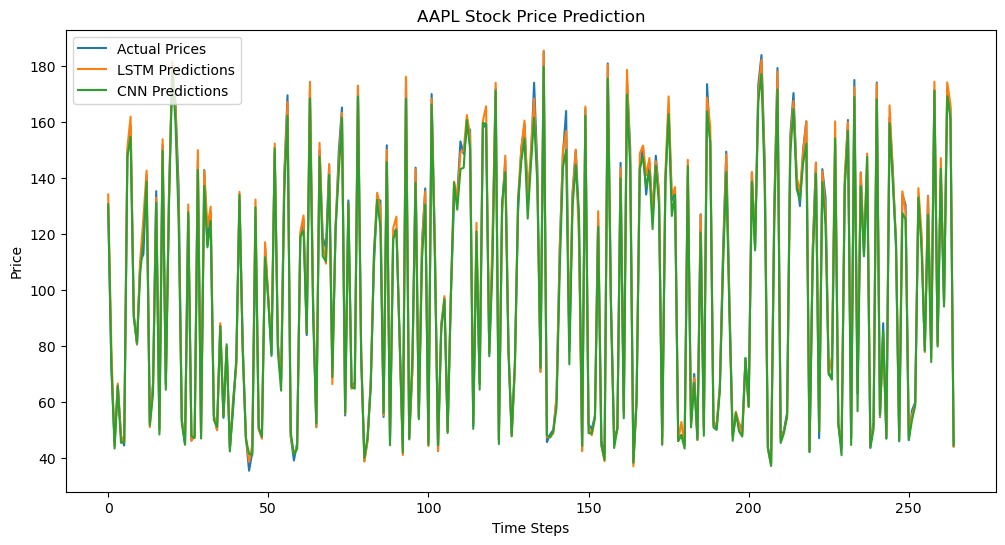


Analyzing AMZN


[*********************100%***********************]  1 of 1 completed
C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AMZN Results:
LSTM Mean Absolute Error: $2.26
CNN Mean Absolute Error: $2.68
LSTM Root Mean Squared Error: $2.99
CNN Root Mean Squared Error: $3.55


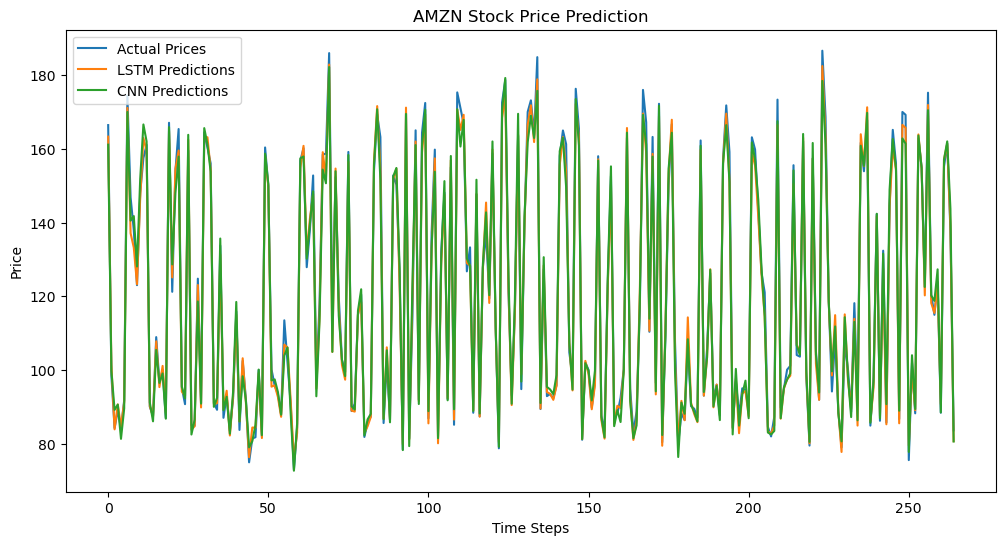


Analyzing GOOGL


[*********************100%***********************]  1 of 1 completed
C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
GOOGL Results:
LSTM Mean Absolute Error: $1.72
CNN Mean Absolute Error: $1.72
LSTM Root Mean Squared Error: $2.21
CNN Root Mean Squared Error: $2.37


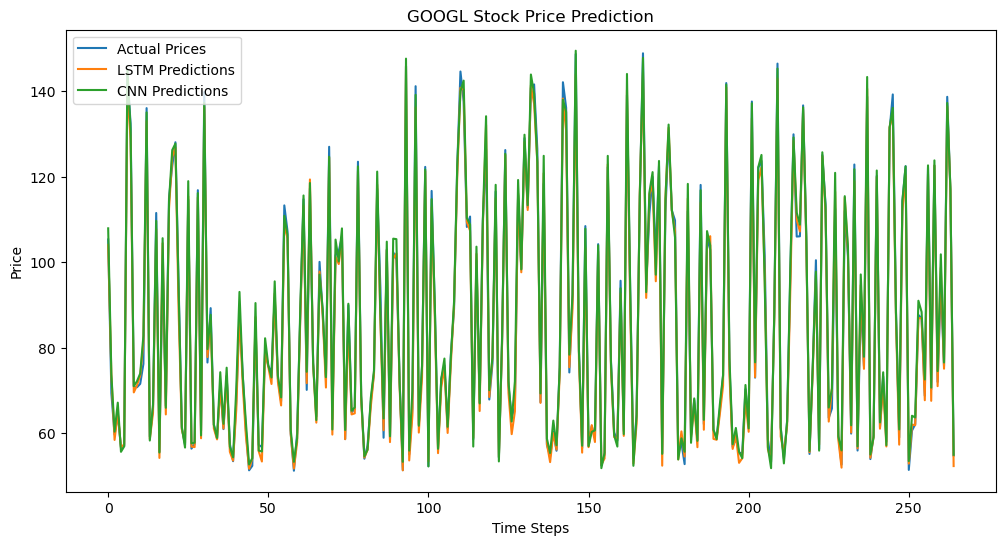


Analyzing TSLA


[*********************100%***********************]  1 of 1 completed
C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
TSLA Results:
LSTM Mean Absolute Error: $5.85
CNN Mean Absolute Error: $5.31
LSTM Root Mean Squared Error: $9.67
CNN Root Mean Squared Error: $8.68


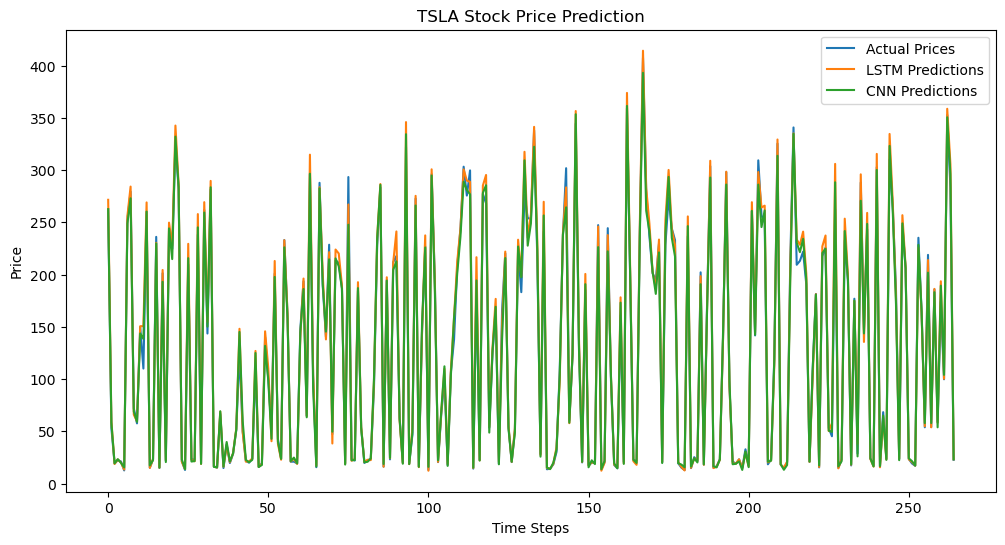


Analyzing META


[*********************100%***********************]  1 of 1 completed
C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Riya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
META Results:
LSTM Mean Absolute Error: $4.89
CNN Mean Absolute Error: $4.89
LSTM Root Mean Squared Error: $6.32
CNN Root Mean Squared Error: $6.47


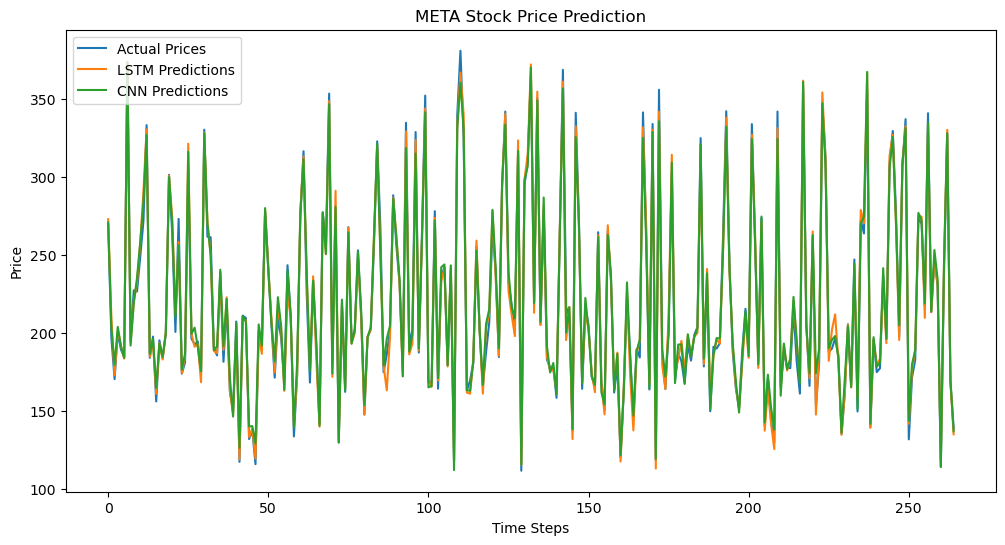

In [8]:
# List of companies to analyze
companies = ['AAPL', 'AMZN', 'GOOGL', 'TSLA', 'META']

# Set date range
start_date = '2018-01-01'
end_date = '2023-06-30'

for ticker in companies:
    print(f"\nAnalyzing {ticker}")
    
    # Get stock data
    data = get_stock_data(ticker, start_date, end_date)
    
    # Prepare features
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    # Normalize the features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[features])
    
    # Create sequences
    seq_length = 60
    X, y = create_sequences(scaled_data, seq_length)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Build and train LSTM model
    lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
    
    # Build and train CNN model
    cnn_model = build_cnn_model((X_train.shape[1], X_train.shape[2]))
    cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
    
    # Make predictions
    lstm_predictions = lstm_model.predict(X_test)
    cnn_predictions = cnn_model.predict(X_test)
    
    # Inverse transform predictions
    y_test_inverse = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], y_test.reshape(-1, 1), X_test[:, -1, 4:]), axis=1))[:, 3]
    lstm_predictions_inverse = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], lstm_predictions, X_test[:, -1, 4:]), axis=1))[:, 3]
    cnn_predictions_inverse = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], cnn_predictions, X_test[:, -1, 4:]), axis=1))[:, 3]
    
    # Evaluate and visualize results
    evaluate_and_visualize(ticker, y_test_inverse, lstm_predictions_inverse, cnn_predictions_inverse)